# **Skin Cancer Melanoma Detection Assignment**

**SUBMITTED BY:**

**Gurpreet Kaur (gurpreetkaurjethrap@gmail.com)**


**Problem statement:** 

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

# Data Reading/Data Understanding
### Importing Skin Cancer Data


### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/Skin cancer/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/Skin cancer/Test')

In [ ]:
# Print the size of train and test data
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## **II. Dataset Creation & visualization** 

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

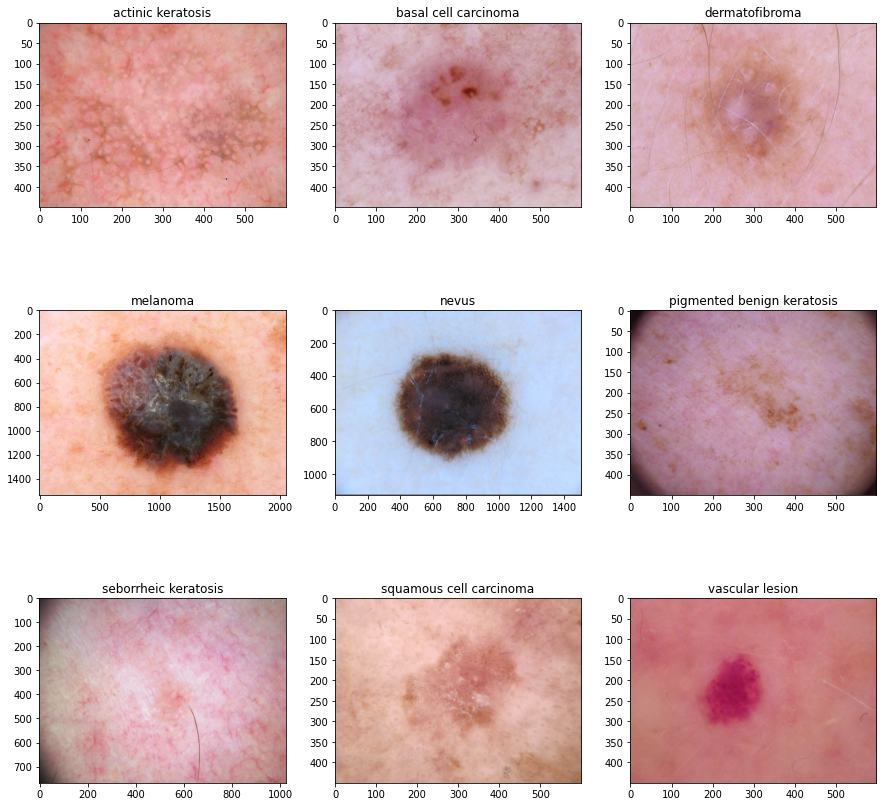

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(15,15))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## III. Model Building

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

#First Convulation layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# flatten and put a fully connected Softmax layer
model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 668s 2s/step - loss: 2.0645 - accuracy: 0.1970 - val_loss: 2.0397 - val_accuracy: 0.2170
Epoch 2/20
56/56 [==============================] - 4s 75ms/step - loss: 2.0218 - accuracy: 0.2009 - val_loss: 2.0076 - val_accuracy: 0.2215
Epoch 3/20
56/56 [==============================] - 4s 75ms/step - loss: 2.0207 - accuracy: 0.2059 - val_loss: 2.0210 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 4s 76ms/step - loss: 2.0158 - accuracy: 0.2132 - val_loss: 2.0323 - val_accuracy: 0.2081
Epoch 5/20
56/56 [==============================] - 4s 76ms/step - loss: 2.0169 - accuracy: 0.1897 - val_loss: 2.0320 - val_accuracy: 0.1924
Epoch 6/20
56/56 [==============================] - 4s 75ms/step - loss: 2.0173 - accuracy: 0.2026 - val_loss: 2.0399 - val_accuracy: 0.1566
Epoch 7/20
56/56 [==============================] - 4s 76ms/step - loss: 2.0517 - accuracy: 0.1959 - val_loss: 2.0225 - val_accuracy: 0.2081
Epoch 8/20
56/56 [======

### Visualizing training results

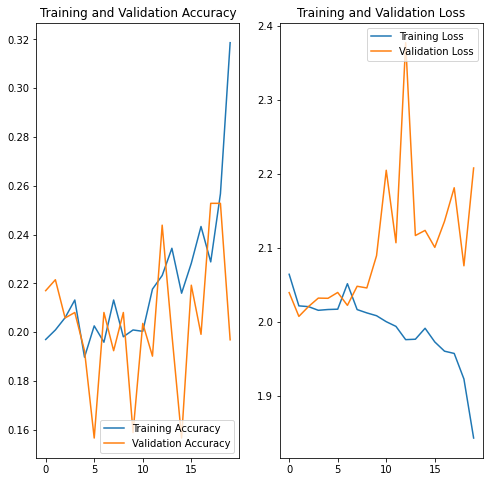

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

**Finding on the first base model**

- The model seems to be overfitting because we can also see **Huge difference in loss functions** in training & validation sets.

- Thus, model seems to **Overfit** as there is a **huge gap** between **Training and Validation accuracy**

## **Rebuilding the Model with some Augmentation Strategies**

Let's use some Data augumentation strategy from tensorflow to preprocess image:

- RandomFlip
- RandomRotation
- RandomZoom

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augument = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
    layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])


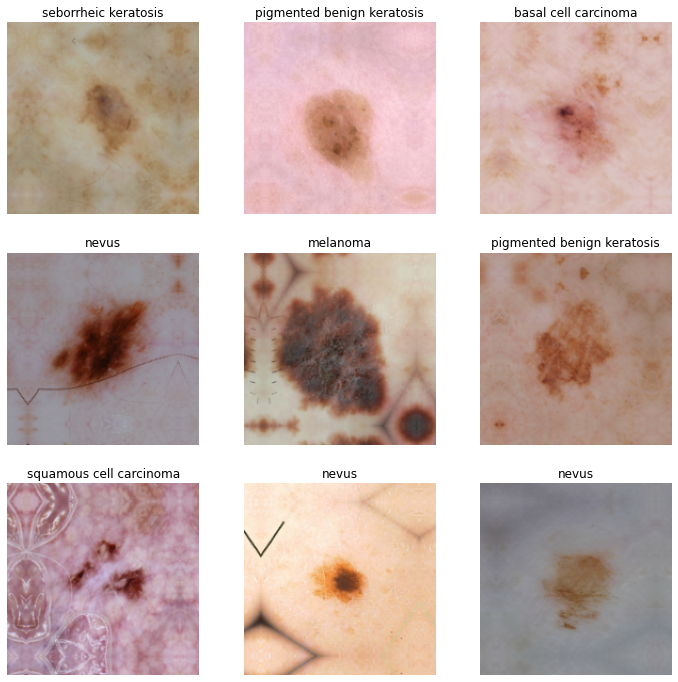

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
input_shape = (img_height, img_width, 3);
model = Sequential()

# Add augmented layers
model.add(data_augument)
model.add(layers.Rescaling(scale=1./255, input_shape=input_shape))

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu', padding='same'))
#model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.Dropout(0.25))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu', padding='same'))
#model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

# flatten and put a fully connected layer
model.add(layers.Flatten())
# model.add(layers.Dense(128))
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.25))

# softmax layer
model.add(layers.Dense(len(class_names), activation='softmax'))

# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 89, 89, 64)        18496     
                                                      

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(train_ds,validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 8s 103ms/step - loss: 1.9737 - accuracy: 0.2790 - val_loss: 1.6343 - val_accuracy: 0.4004
Epoch 2/20
56/56 [==============================] - 5s 94ms/step - loss: 1.5904 - accuracy: 0.4241 - val_loss: 1.5726 - val_accuracy: 0.4295
Epoch 3/20
56/56 [==============================] - 5s 93ms/step - loss: 1.5527 - accuracy: 0.4609 - val_loss: 1.6202 - val_accuracy: 0.4139
Epoch 4/20
56/56 [==============================] - 5s 98ms/step - loss: 1.4766 - accuracy: 0.4749 - val_loss: 1.4265 - val_accuracy: 0.5078
Epoch 5/20
56/56 [==============================] - 6s 101ms/step - loss: 1.4278 - accuracy: 0.5045 - val_loss: 1.4674 - val_accuracy: 0.5056
Epoch 6/20
56/56 [==============================] - 5s 95ms/step - loss: 1.4100 - accuracy: 0.5006 - val_loss: 1.4197 - val_accuracy: 0.5391
Epoch 7/20
56/56 [==============================] - 5s 95ms/step - loss: 1.3621 - accuracy: 0.5212 - val_loss: 1.4875 - val_accuracy: 0.4922
Epoch 8/20


### Visualizing the results

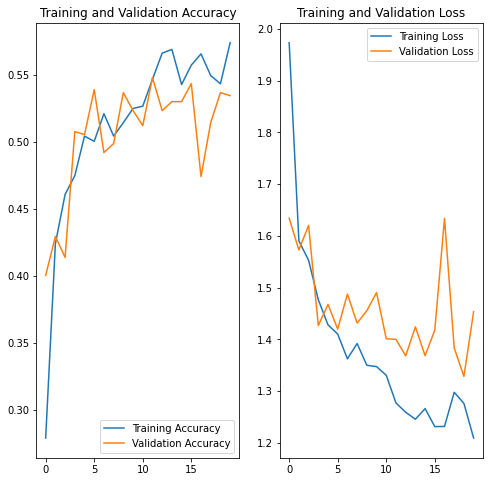

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Insights from Second Model:**

- 1.1 The **second model After Augmentation is Very much better** than the first one wrt to the Training & Validation Accuracy **Improvement!**
- 1.2 Infact, the **overfitting problem is also resolved Comparatively** to **high extent** due to data Augmentation.  
- 1.3 We can **increase the epochs** to increase the accuracy & overall performance.

# **Examining Class distribution** 

## **Find the distribution of classes in the training dataset.** 
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Colab Notebooks/Skin ca...,actinic keratosis
1,/content/drive/MyDrive/Colab Notebooks/Skin ca...,actinic keratosis
2,/content/drive/MyDrive/Colab Notebooks/Skin ca...,actinic keratosis
3,/content/drive/MyDrive/Colab Notebooks/Skin ca...,actinic keratosis
4,/content/drive/MyDrive/Colab Notebooks/Skin ca...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Colab Notebooks/Skin ca...,vascular lesion
2235,/content/drive/MyDrive/Colab Notebooks/Skin ca...,vascular lesion
2236,/content/drive/MyDrive/Colab Notebooks/Skin ca...,vascular lesion
2237,/content/drive/MyDrive/Colab Notebooks/Skin ca...,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


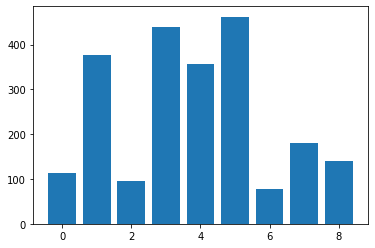

In [ ]:
# Create a dataframe with class name and count of image in that class
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

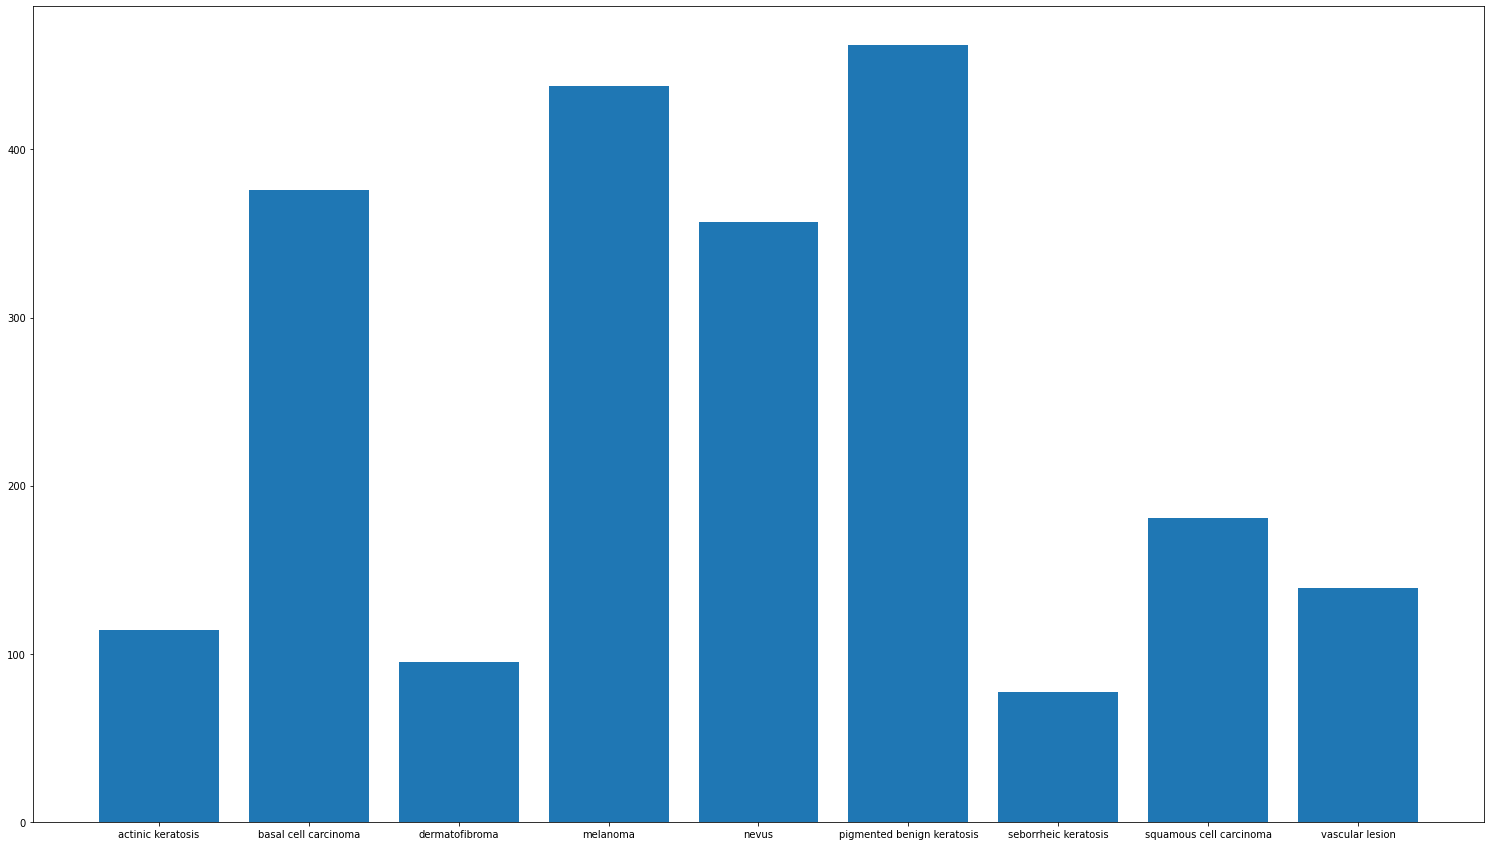

In [ ]:
#  Examining the current class distribution in the training dataset 
count=[]
for n in class_names:
    count.append(len(list(data_dir_train.glob(n+'/*.jpg'))))
plt.figure(figsize=(26,15))
plt.bar(class_names,count)
plt.show()

### **Findings/Insights of Class Distribution:**   

#### - **Which class has the least number of samples?**
Answer-1 :-     
We can see that **"seborrheic keratosis"** has the least number of samples.


#### - **Which classes dominate the data in terms proportionate number of samples?**
Answer-2:-       
A) We can observe from plot that **"melanoma" and "pigmented benign keratosis"** have proportionate number of samples in them.   
B)  Similar type of proportionate number of samples can be seen in **"basal cell carcinoma" and "nevus".**


In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

**Insight:**
- `**seborrheic keratosis**` has the **least number** of **samples (77)**
- `**pigmented benigh keratosis** ` has the **most number of samples (462)**


***We can see the imbalance in class distribution of the dataset***

# **Handling class imbalances**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F09A7F87250>: 100%|██████████| 500/500 [00:19<00:00, 25.14 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F092869AF10>: 100%|██████████| 500/500 [00:23<00:00, 21.46 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F08C5771A30>: 100%|██████████| 500/500 [00:18<00:00, 27.11 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F09A5E5FA30>: 100%|██████████| 500/500 [01:21<00:00,  6.13 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F0990049670>: 100%|██████████| 500/500 [01:16<00:00,  6.58 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F08C578FA30>: 100%|██████████| 500/500 [00:18<00:00, 27.53 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F09A6034730>: 100%|██████████| 500/500 [00:41<00:00, 12.14 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F09A5DBE6A0>: 100%|██████████| 500/500 [00:17<00:00, 28.13 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F094234C730>: 100%|██████████| 500/500 [00:17<00:00, 28.13 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
from glob import glob
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/Colab Notebooks/Skin ca...,actinic keratosis
1,/content/drive/MyDrive/Colab Notebooks/Skin ca...,actinic keratosis
2,/content/drive/MyDrive/Colab Notebooks/Skin ca...,actinic keratosis
3,/content/drive/MyDrive/Colab Notebooks/Skin ca...,actinic keratosis
4,/content/drive/MyDrive/Colab Notebooks/Skin ca...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Colab Notebooks/Skin ca...,vascular lesion
2235,/content/drive/MyDrive/Colab Notebooks/Skin ca...,vascular lesion
2236,/content/drive/MyDrive/Colab Notebooks/Skin ca...,vascular lesion
2237,/content/drive/MyDrive/Colab Notebooks/Skin ca...,vascular lesion


In [ ]:
new_df.shape

(2239, 2)

In [ ]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

### **Lets see the distribution of augmented data after adding new images to the original training data.**   

In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0027084.jpg_149aede5-2c41-404f-b674-c516759bdbb1.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0029371.jpg_e5c9968d-f21a-43c7-b56f-82021c58542a.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0027708.jpg_20127ed2-04d4-4305-97eb-62ec4d938ac0.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030297.jpg_8da18c9b-7f17-402b-bf7a-b05eb2804153.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030158.jpg_b7860c5d-652c-4131-b4f0-ed9b198c450d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Skin cancer/Train/squamous cell carcinoma/ou

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carc

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

**Insight:**   
So, now we have **added 500 images to all the classes to maintain some class balance**. We can add more images as we want to improve training process.

# **Model Building & training on the rectified class imbalance data**   

### **Train the model on the data created using Augmentor** 

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

### **Create a training dataset**    

In [ ]:
data_dir_train="/content/drive/MyDrive/Colab Notebooks/Skin cancer/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


###  **Create a validation dataset**   

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


## **Model Building**      

### Create your model (make sure to include normalization)

#### **MODEL - 1**

In [ ]:
## your code goes here
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])

#First Convolution layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

# flatten and put a fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(512, kernel_regularizer=l2(0.01)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# softmax layer
model.add(layers.Dense(len(class_names), activation='softmax'))

## **Compile your model (Choose optimizer and loss function appropriately)**  

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###  **Training Model**  

In [ ]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 39s 216ms/step - loss: 26.7196 - accuracy: 0.2491 - val_loss: 36.2919 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 35s 203ms/step - loss: 9.7362 - accuracy: 0.2910 - val_loss: 20.1668 - val_accuracy: 0.1982
Epoch 3/30
169/169 [==============================] - 35s 199ms/step - loss: 4.6038 - accuracy: 0.3264 - val_loss: 6.8047 - val_accuracy: 0.3007
Epoch 4/30
169/169 [==============================] - 34s 197ms/step - loss: 3.9809 - accuracy: 0.3234 - val_loss: 4.1736 - val_accuracy: 0.3363
Epoch 5/30
169/169 [==============================] - 35s 199ms/step - loss: 3.5344 - accuracy: 0.3292 - val_loss: 3.5089 - val_accuracy: 0.3682
Epoch 6/30
169/169 [==============================] - 34s 197ms/step - loss: 3.3624 - accuracy: 0.3140 - val_loss: 3.2258 - val_accuracy: 0.3289
Epoch 7/30
169/169 [==============================] - 34s 197ms/step - loss: 2.7108 - accuracy: 0.3548 - val_loss: 3.5797 - val_accuracy: 

#### **Todo:**  Visualize the model results

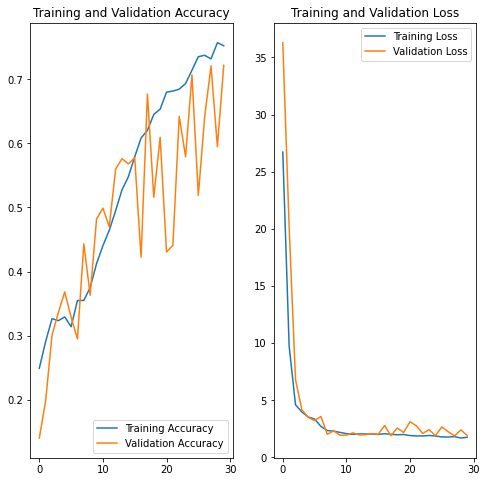

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **MODEL - 2**

### **Create, compile and train the model**  

In [ ]:
from tensorflow.keras.regularizers import l2

input_shape = (img_height, img_width, 3);
# model
model = Sequential()

model.add(layers.Rescaling(scale=1./255, input_shape=input_shape))

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

# flatten and put a fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(512, kernel_regularizer=l2(0.01)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# softmax layer
model.add(layers.Dense(len(class_names), activation='softmax'))

# model summary
model.summary()

# Compile and train model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#Training for 50 epochs
epochs = 50
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 178, 178, 32)      9248      
                                                                 
 batch_normalization_7 (Batc  (None, 178, 178, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 89, 89, 32)      

### **Visualize the Model Results:**

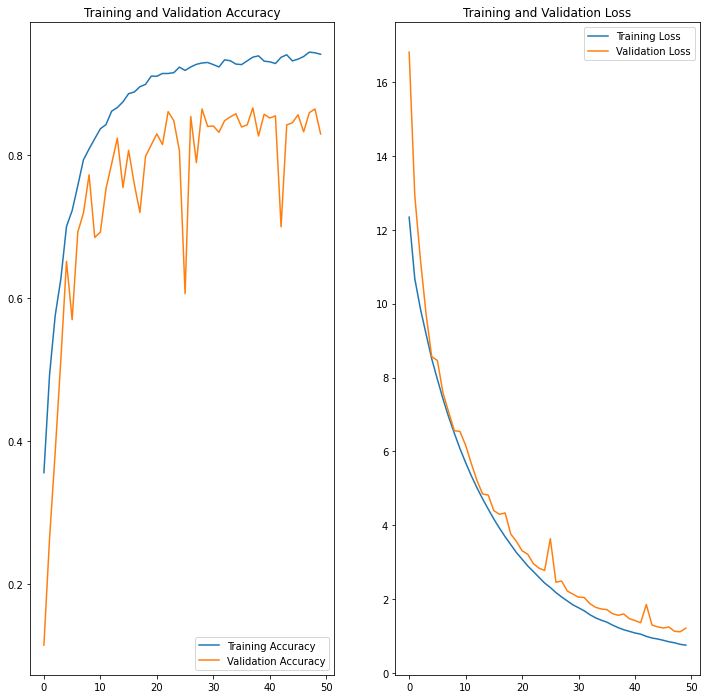

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## **Insights:**  

1.  After **20 epochs**, the training accuracy is 60% and validation accuracy is 50%, which is better than the first model
2.  After **30 epochs** the training accuracy is 75% and validation accuracy is 70% with least overfitting.
3.  After **50 epochs** the **Training Accuracy is 94%** and **Validation Accuracy is 83%**, the model Performance drastically Improved with **No overfitting**


## **Inferences/Observations:**    

* By using **Augmentor library, Data Imbalance Issue is Resolved** & **Overall Accuracy** on training data has **Increased**.

* By adding more CNN layers with **Batch Normalization** & also adding **dropouts**, the **Problem of Overfitting is completely Resolved** now.

* By **tuning the hyperparameter Model**, wrt no of epochs, using appropriate optimizer & loss function, augmentation, class imbalance handling thereby further Drastic Improvement wrt **Increased Performance** was observed.

* **Class Rebalance Really Helped** with **Good Model Performance & Accuracy with No Overfitting** shows evidence issues are resolved.